# Aperiodic Methods: Literature Search

Here we will explore the prevalence of different measures of aperiodic activity in the literature.

To do so, we will use [LISC](https://github.com/lisc-tools/lisc), a Python module for collecting and analyzing scientific literature. More information on LISC can be found in the [documentation](https://lisc-tools.github.io/lisc/).

To explore the prevalence and use cases of aperiodic measures, we will collect information from the Pubmed database on the number of papers that include search terms mentioning aperiodic activity and measures, as well as the number of papers that mention these terms of interest in co-occurrence with specified association terms.

Note that collecting literature data in this way is likely an under-estimate of the use of these measures, as the approach employed here only searches for search terms occurring in abstracts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')

In [2]:
# Import LISC code
from lisc import Counts
from lisc.utils import save_object, load_object
from lisc.plts.counts import plot_matrix
from lisc.plts.utils import get_cmap

## Settings

In [3]:
# Settings for literature collection
db = 'pubmed'
#db = 'pmc'

In [4]:
# Set paths
dp = ... # data path
fp = ... # figures path

In [5]:
# Initialize counts object
counts = Counts()

In [6]:
# Notebook settings
RUN_COLLECTION = True
SAVE_FIG = False
SAVE_DATA = False

## Define Terms

Notes: figure out if organizing by method and/or concept... 

In [7]:
# Set terms list
#   Note: each set of terms within a list is a defined as a set of synonyms
ap_terms = [['1/f', 'aperiodic', ],
            ['entropy'],
            ['autocorrelation'],
            ['fractal', 'scale free'],
            ['criticality'],
            ['dfa', 'detrended fluctuation analysis'],
           ]

#ap_methods = [['spectral parameterization', 'fooof'], 
#              ['irasa', 'cgsa'],
#              ['fractal exponent']]
#ap_terms = ap_methods

# Set inclusion / exclusion terms
inclusions = ['EEG', 'electroencephalography', 'MEG', 'magnetoencephalography', 
              'ECoG', 'electrocorticography', 'iEEG', 'intracranial EEG',
              'LFP', 'local field potential']
ap_inclusions = [inclusions] * len(ap_terms)

In [8]:
# Define a list of association terms
assoc_terms = [['aging', 'development'],
               ['cognitive', 'cognition', 'task', 'behavior'],
               ['sleep', 'anesthesia'],
               ['clinical', 'disease', 'disorder']
              ]

## Add & Check Terms

Now we can add these terms to LISC objects, ready for data collection. 

In [9]:
# Add terms to the LISC object
counts.add_terms(ap_terms)
counts.add_terms(ap_inclusions, term_type='inclusions')
counts.add_terms(assoc_terms, dim='B')

In [10]:
# Check terms
counts.terms['A'].check_terms()

List of terms used: 

1/f              : 1/f, aperiodic
entropy          : entropy
autocorrelation  : autocorrelation
fractal          : fractal, scale free
criticality      : criticality
dfa              : dfa, detrended fluctuation analysis


In [11]:
# Check terms
counts.terms['B'].check_terms()

List of terms used: 

aging      : aging, development
cognitive  : cognitive, cognition, task, behavior
sleep      : sleep, anesthesia
clinical   : clinical, disease, disorder


## Collect Literature Data

Run literature collection. 

In [12]:
# Run the data collection
if RUN_COLLECTION:
    counts.run_collection(db=db)
else:
    counts = load_object('aps_counts.p', directory=dp.literature)

## Check and Process Collected Data



In [13]:
# Check how many papers were found for each ratio search term
counts.check_counts()

The number of documents found for each search term is:
  '1/f'               -    210
  'entropy'           -   1626
  'autocorrelation'   -    136
  'fractal'           -    434
  'criticality'       -     86
  'dfa'               -    146


In [14]:
# Check the total number of papers across all ratio terms
n_total = sum(counts.terms['A'].counts)
print('Total number of aperiodic measure papers is: \t', n_total)

Total number of aperiodic measure papers is: 	 2638


In [15]:
# Normalize the association results
counts.compute_score('normalize', dim='A')

## Create Visualizations of Collected Data

In [16]:
# Set adapted versions of the labels to use for plots
#ap_labels = ['specparam', 'irasa', 'entropy', 'ac', 'f-exp', 'dfa']
#assoc_labels = ['aging', 'cognition', 'state', 'clinical']

ap_labels = counts.terms['A'].labels
assoc_labels = counts.terms['B'].labels

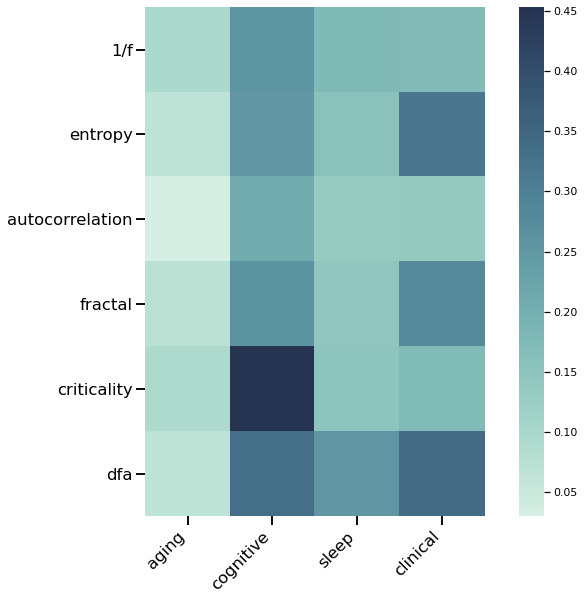

In [17]:
# Plot the associations of aperiodic measures in the literature
fig, ax = plt.subplots(figsize=(10, 8))
plot_matrix(counts.score, assoc_labels, ap_labels, cmap='blue', square=True, ax=ax)
plt.xticks(rotation=45, horizontalalignment='right');

#if SAVE_FIG: plt.savefig(fp.make_file_path(fp.literature, 'AP-Associations', 'pdf'))

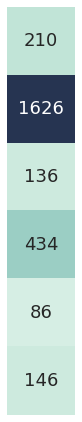

In [18]:
# Plot the number of papers found per ratio measure
data = np.expand_dims(counts.terms['A'].counts, 1)

fig, ax = plt.subplots(figsize=(2.5, 7.5))
sns.heatmap(data,
            cmap=get_cmap('blue'),
            xticklabels=[],
            yticklabels=[],
            annot=True, annot_kws={"size": 18}, cbar=False, fmt='d', square=True);

if SAVE_FIG: plt.savefig(fp.make_file_path(fp.literature, 'AP-Counts', 'pdf'))

In [19]:
# Save out the collected data
#if SAVE_DATA:
#    save_object(counts, 'aps_counts', directory=dp.literature)